# Logarithming Features

https://www.youtube.com/watch?v=cJpWQkoe4BA&list=PLTNMv857s9WUI1Nz4SssXDKAELESXz-bi&index=4

In [1]:
import numpy as np
import pandas as pd

import math
import random

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [2]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

In [3]:
price = [1000, 9000, 500, 3000, 9500, 1500, 4000, 2000, 2500]
age = [28, 40, 58, 12, 3, 23, 4, 13, 5]
odometer = [30.298, 19.647, 170.270, 68.394, 11.662, 87.973, 3.496, 40.986, 21.098]

## let's create 1000 more similar objects:

In [4]:
range_11, range_12 = 0.95, 1.05
range_21, range_22 = -0.1, 0.1

price += [((_ ** random.uniform(range_11, range_12)) + (_ * random.uniform(range_21, range_22))) for _ in price * 1000]
age += [((_ ** random.uniform(range_11, range_12)) + (_ * random.uniform(range_21, range_22))) for _ in age * 1000]
odometer += [((_ ** random.uniform(range_11, range_12)) + (_ * random.uniform(range_21, range_22))) for _ in odometer * 1000]

In [5]:
df = pd.DataFrame({
    'price': price,
    'age': age,
    'odometer': odometer
})

df

,price,age,odometer
0,1000.000000,28.000000,30.298000
1,9000.000000,40.000000,19.647000
2,500.000000,58.000000,170.270000
3,3000.000000,12.000000,68.394000
4,9500.000000,3.000000,11.662000
...,...,...,...
9004,8919.971824,3.164484,9.496266
9005,1568.951236,20.450128,78.377583
9006,6032.691115,3.407141,3.472907
9007,2601.390712,11.490646,35.528672


## let's see the distribution of the features (including the target):

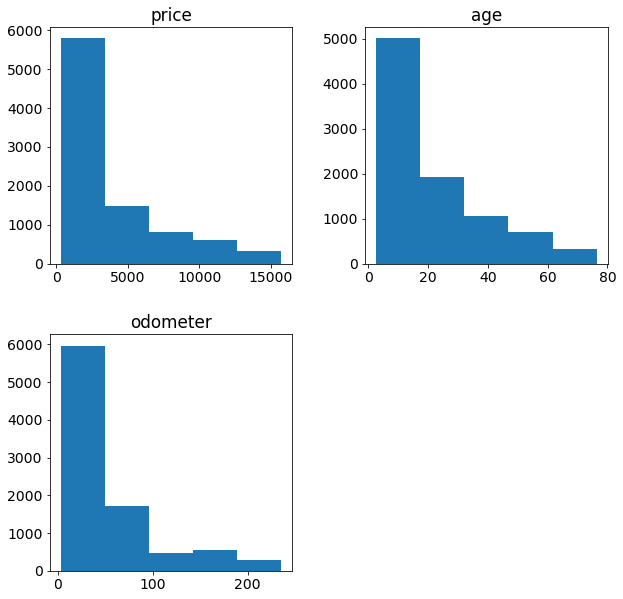

In [6]:
df.hist(figsize=(10, 10), bins=5, grid=False);

## let's also take a look on dependancies of features with the target:

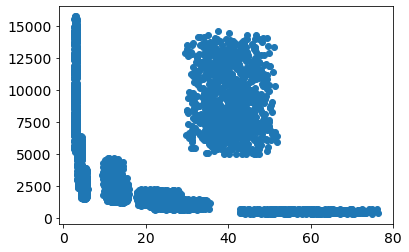

In [7]:
plt.scatter(df['age'], df['price'])
plt.show()

### as it's seen there's no linear dependance; it resemles hyperbola

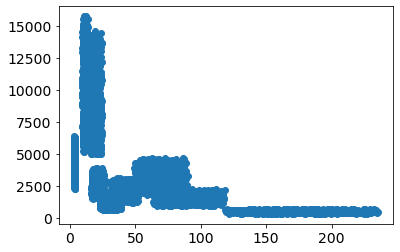

In [8]:
plt.scatter(df['odometer'], df['price'])
plt.show()

### as it's seen there's no linear dependance; it resemles hyperbola

In [9]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(5,5))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 10000], [0, 10000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

In [10]:
def print_coefs(columns, coefficients, intercept):
    print(f'intercept: {intercept}')
    for _ in zip(columns, coefficients):
        print(f'{_[0]}: {_[1]}')

# 1.

## let's create a LinearRegression model, train it and predict the results on the same data:

In [11]:
X = df[['age', 'odometer']].copy()
y = df['price'].copy()

In [12]:
model = LinearRegression()

R2:	0.285
RMSE:	2960.107
MSE:	8762234.53


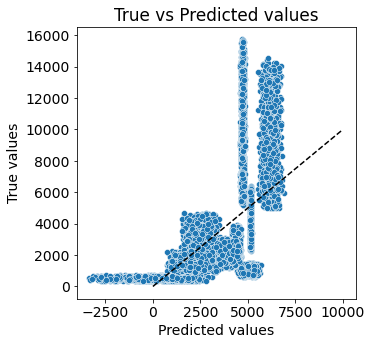

In [13]:
model.fit(X, y)
y_predicted = model.predict(X)
evaluate_preds(y, y_predicted)

## let's see the coefficients the model has got:

In [14]:
print_coefs(X.columns, model.coef_, model.intercept_)

intercept: 5109.992368208992
age: 48.875111096747304
odometer: -46.173258251444096


### looks like the model increases a price of a car by 64.72 for each year of age

### that's wrong!

# 2.

## let's create a new feature named 'age_log' by logarithming 'age':

In [15]:
X = df[['age', 'odometer']].copy()
y = df['price'].copy()

X['age_log'] = X['age'].apply(lambda x: math.log(x))
X = X[[
       'age',
       'odometer', 
       'age_log'
      ]]

R2:	0.408
RMSE:	2692.689
MSE:	7250576.29


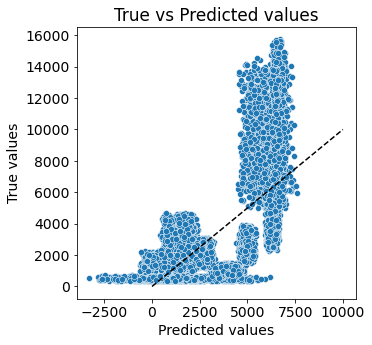

In [16]:
model.fit(X, y)
y_predicted = model.predict(X)
evaluate_preds(y, y_predicted)

### R2 improved

# 3.

## let's add one more feature named 'odometer_log' by logarithming 'odometer':

In [17]:
X = df[['age', 'odometer']].copy()
y = df['price'].copy()

X['age_log'] = X['age'].apply(lambda x: math.log(x))
X['odometer_log'] = X['odometer'].apply(lambda x: math.log(x))
X = X[[
       'age',
       'odometer', 
       'age_log',
       'odometer_log'
      ]]

R2:	0.423
RMSE:	2658.8
MSE:	7069215.291


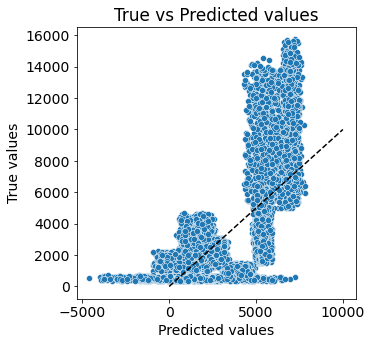

In [18]:
model.fit(X, y)
y_predicted = model.predict(X)
evaluate_preds(y, y_predicted)

### R2 improved

## let's see the coefficients the model has gotten:

In [19]:
print_coefs(X.columns, model.coef_, model.intercept_)

intercept: 9050.617023020512
age: 265.53363466062996
odometer: -65.25503037614178
age_log: -4286.086801247396
odometer_log: 1072.349515132145


### looks like the model is trying to balance somehow features and their logarithmic versions: 'age' has positive coefficient, but its derivative not; the same applies to 'odometer'

# 4.

## let's apply StandardScaler and MinMaxScaler:

In [20]:
X = df[['age', 'odometer']].copy()
y = df['price'].copy()

X['age_log'] = X['age'].apply(lambda x: math.log(x))
X['odometer_log'] = X['odometer'].apply(lambda x: math.log(x))
X

,age,odometer,age_log,odometer_log
0,28.000000,30.298000,3.332205,3.411082
1,40.000000,19.647000,3.688879,2.977925
2,58.000000,170.270000,4.060443,5.137385
3,12.000000,68.394000,2.484907,4.225285
4,3.000000,11.662000,1.098612,2.456336
...,...,...,...,...
9004,3.164484,9.496266,1.151990,2.250899
9005,20.450128,78.377583,3.017989,4.361538
9006,3.407141,3.472907,1.225873,1.244992
9007,11.490646,35.528672,2.441533,3.570340


In [21]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [22]:
# scaler = StandardScaler()
scaler = MinMaxScaler()

X[X.columns] = scaler.fit_transform(X)
X

,age,odometer,age_log,odometer_log
0,0.344631,0.117588,0.704571,0.531941
1,0.507173,0.071800,0.809569,0.433085
2,0.750986,0.719328,0.918949,0.925925
3,0.127909,0.281363,0.455145,0.717762
4,0.006002,0.037472,0.047051,0.314046
...,...,...,...,...
9004,0.008230,0.028162,0.062764,0.267160
9005,0.242367,0.324282,0.612073,0.748858
9006,0.011517,0.002267,0.084514,0.037588
9007,0.121009,0.140075,0.442377,0.568288


R2:	0.423
RMSE:	2658.8
MSE:	7069215.291


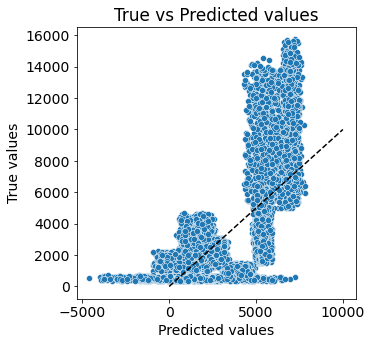

In [23]:
model.fit(X, y)
y_predicted = model.predict(X)
evaluate_preds(y, y_predicted)

### no changes in R2!!!

In [24]:
print_coefs(X.columns, model.coef_, model.intercept_)

intercept: 6672.095275161637
age: 19603.59398246332
odometer: -15179.124674128914
age_log: -14559.806064244469
odometer_log: 4698.673873859599


# 5.

## let's create 2 more more features - 'age' ** 2 and 'odometer' ** 2

In [25]:
X = df[['age', 'odometer']].copy()
y = df['price'].copy()


X['age_log'] = X['age'].apply(lambda x: math.log(x))
X['odometer_log'] = X['odometer'].apply(lambda x: math.log(x))

# !!!
X['age_squared'] = X['age'].apply(lambda x: x ** 2)
X['odometer_squared'] = X['odometer'].apply(lambda x: x ** 2)


X = X[[
       'age', 
       'odometer', 
       'age_log', 
       'odometer_log',
       'age_squared', 
       'odometer_squared'
      ]]

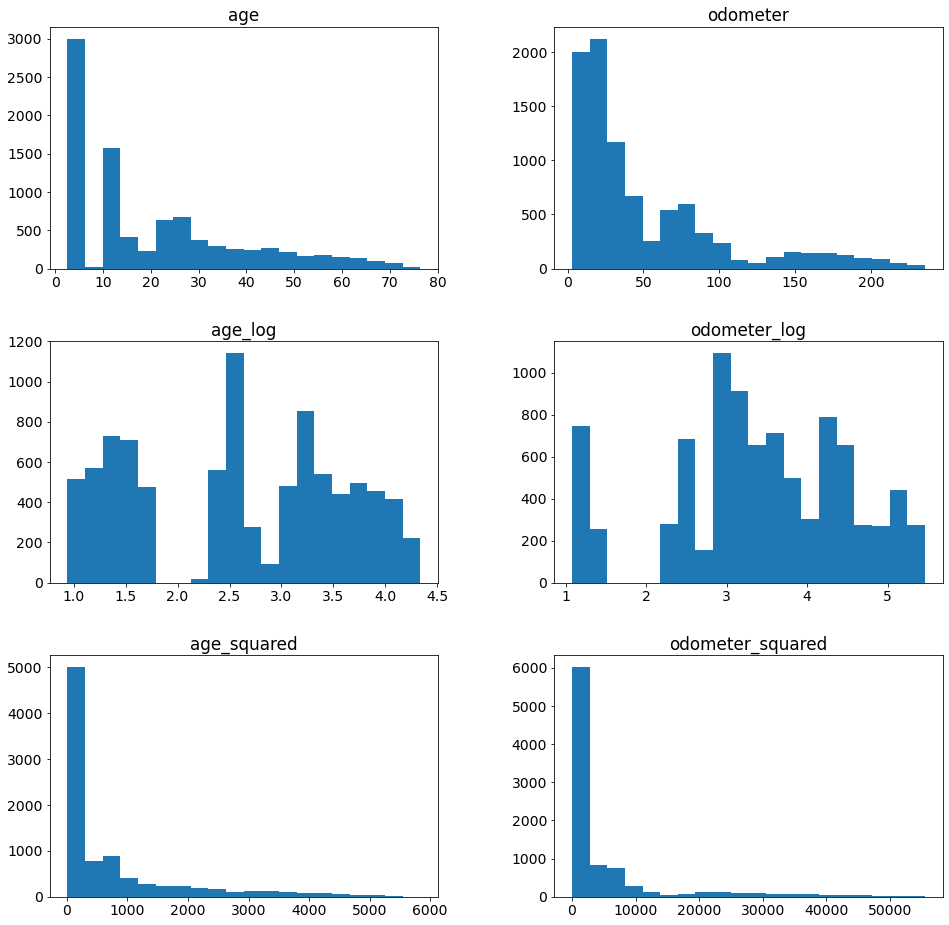

In [26]:
X.hist(figsize=(16, 16), bins=20, grid=False);

R2:	0.513
RMSE:	2442.656
MSE:	5966566.355


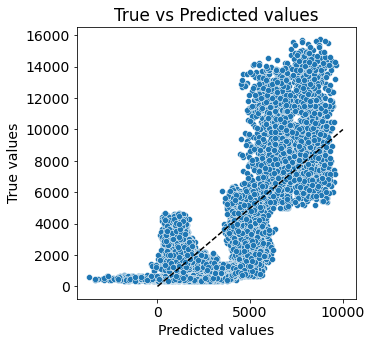

In [27]:
model.fit(X, y)
y_predicted = model.predict(X)
evaluate_preds(y, y_predicted)

### R2 improved

## let's see the coefficients the model has gotten:

In [28]:
print_coefs(X.columns, model.coef_, model.intercept_)

intercept: 14144.915451321993
age: 1063.4879112045269
odometer: -54.25434229408939
age_log: -11054.452967808556
odometer_log: 1536.3186871537494
age_squared: -8.17621717497932
odometer_squared: -0.0137035065571726


# 6.

## let's try to logarithm and delogarithm the target:

In [29]:
X = df[['age', 'odometer']].copy()
y = df['price'].copy()

y = y.apply(lambda x: math.log(x)) # !!!

X['age_log'] = X['age'].apply(lambda x: math.log(x))
X['odometer_log'] = X['odometer'].apply(lambda x: math.log(x))


X['age_squared'] = X['age'].apply(lambda x: x ** 2)
X['odometer_squared'] = X['odometer'].apply(lambda x: x ** 2)


X = X[['age', 
       'odometer', 
       'age_log', 
       'odometer_log', 
       'age_squared', 
       'odometer_squared'
      ]]
X

,age,odometer,age_log,odometer_log,age_squared,odometer_squared
0,28.000000,30.298000,3.332205,3.411082,784.000000,917.968804
1,40.000000,19.647000,3.688879,2.977925,1600.000000,386.004609
2,58.000000,170.270000,4.060443,5.137385,3364.000000,28991.872900
3,12.000000,68.394000,2.484907,4.225285,144.000000,4677.739236
4,3.000000,11.662000,1.098612,2.456336,9.000000,136.002244
...,...,...,...,...,...,...
9004,3.164484,9.496266,1.151990,2.250899,10.013957,90.179062
9005,20.450128,78.377583,3.017989,4.361538,418.207754,6143.045545
9006,3.407141,3.472907,1.225873,1.244992,11.608609,12.061086
9007,11.490646,35.528672,2.441533,3.570340,132.034941,1262.286516


R2:	0.439
RMSE:	2621.357
MSE:	6871512.882


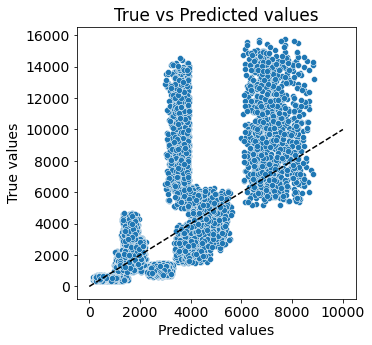

In [30]:
model.fit(X, y)
y_predicted = model.predict(X)
evaluate_preds(math.e ** y, math.e ** y_predicted)  # to delogarithm the answers it's just required 
                                                    # to raise math.e to power of y

### R2 deteriorated